In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from DomainPrediction.utils import helper
from DomainPrediction.eval import metrics
# from DomainPrediction.esm.esm2 import ESM2

sys.path.append('../../esm')
from DomainPrediction.esm.esm3 import ESM3LM
from DomainPrediction.esm.esmc import ESMCLM

2025-01-06 10:36:03.175945: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 10:36:03.178218: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-06 10:36:03.183640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 10:36:03.194372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 10:36:03.194390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting t

In [4]:
data_path = '/data/users/kgeorge/workspace/Data/al_test_experiments/Tdomain'

In [5]:
file = os.path.join(data_path, 'dataset_tdomain.csv')
df = pd.read_csv(file)

In [6]:
df.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059


In [ ]:
esm3 = ESM3LM(device='gpu')

In [ ]:
embeddings = esm3.get_embeddings_flatten(df['seq'])

In [7]:
esmc = ESMCLM(name='esmc_600m', device='gpu')

In [8]:
embeddings = esmc.get_embeddings_mean(df['seq'])

100%|██████████| 78/78 [00:02<00:00, 30.09it/s]


In [9]:
embeddings.shape

(78, 1152)

In [11]:
perplexities = []
for seq in tqdm(df['seq']):
    perplexities.append(esmc.compute_perplexity(seq))

100%|██████████| 78/78 [02:42<00:00,  2.09s/it]


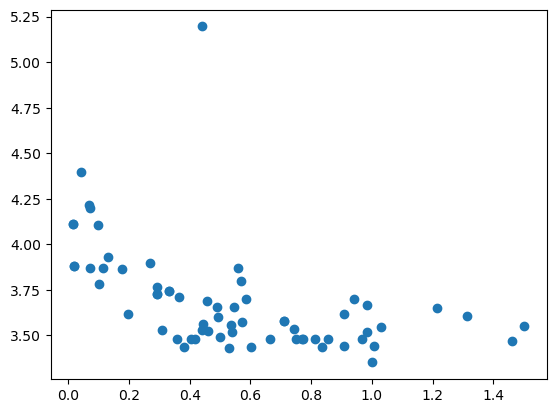

In [12]:
mask = df['fitness_raw'] == 0
plt.scatter(df['fitness_raw'][~mask], np.array(perplexities)[~mask])

In [ ]:
esm2 = ESM2(model_path='/data/users/kgeorge/workspace/esm2/checkpoints/esm2_t33_650M_UR50D.pt', device='gpu')
# esm2 = ESM2(model_path='/data/users/kgeorge/workspace/esm2/checkpoints/esm2_t6_8M_UR50D.pt', device='gpu')

In [ ]:
embeddings = esm2.get_embeddings_feature_pool(df['seq'])

In [ ]:
embeddings.shape

In [ ]:
perplexities = []
for seq in tqdm(df['seq']):
    perplexities.append(esm2.compute_perplexity(seq))

In [ ]:
mask = df['fitness_raw'] == 0
plt.scatter(df['fitness_raw'][~mask], np.array(perplexities)[~mask])